# Basic and Specialized Visualizations tools : All in one notebook

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset
### can2 csv file is a clean data of immigrations to canada from 1980 to 2013

In [35]:
df = pd.read_csv('can2.csv', index_col=0)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Part 1: Matplotlib
### Line plot

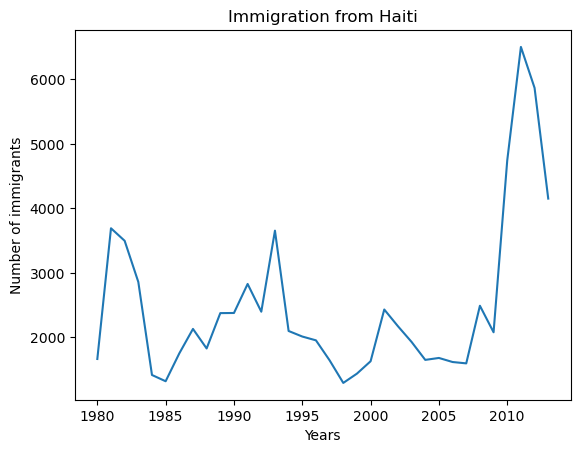

In [36]:
years = list(map(str, range(1980, 2014)))
df.loc['Haiti', years].plot(kind = "line")
plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

### Area plot

In [37]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True) # Just sort data from highest value of immigrations

In [38]:
df_top5 = df.head()
df_top5 = df_top5[years].transpose()
df_top5.rename(columns= {"United Kingdom of Great Britain and Northern Ireland": "UK"}, inplace= True)   # for have more readable df
df_top5.head()

Country,India,China,UK,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


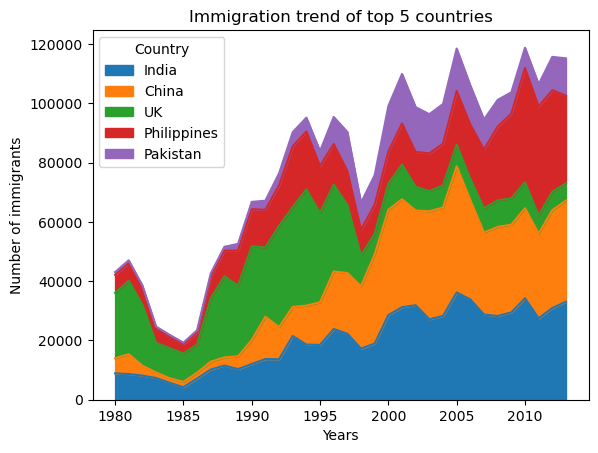

In [39]:
df_top5.plot(kind='area', alpha=1) # alpha is used for transparency
plt.title("Immigration trend of top 5 countries")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")
plt.show()

### Histogram

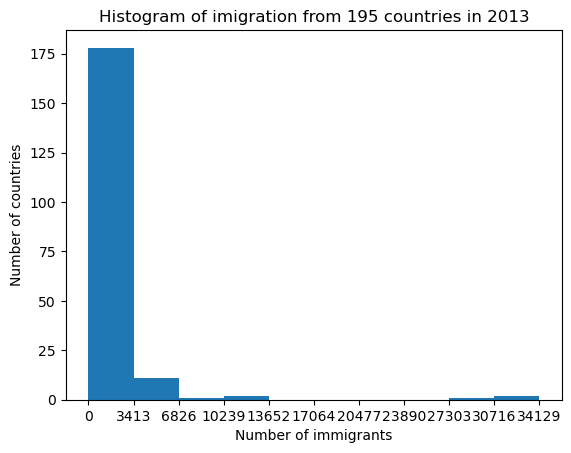

In [40]:
count, bin_edges = np.histogram(df['2013'])
df['2013'].plot(kind='hist', xticks = bin_edges)
plt.title("Histogram of imigration from 195 countries in 2013")
plt.xlabel("Number of immigrants")
plt.ylabel("Number of countries")
plt.show()

### Bar chart

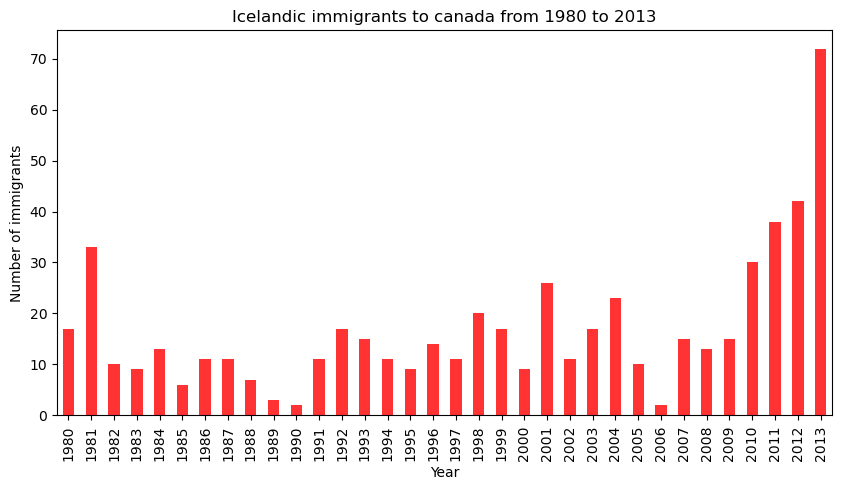

In [41]:
df_iceland = df.loc['Iceland', years]
df_iceland.plot(kind='bar', figsize=(10,5), color='r', alpha=0.8)
plt.title("Icelandic immigrants to canada from 1980 to 2013")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")
plt.show()

### Pie chart

In [42]:
df_continent = df.groupby('Continent', axis=0).sum()
df_continent.drop(['Region', 'DevName'], axis=1, inplace=True)
df_continent

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


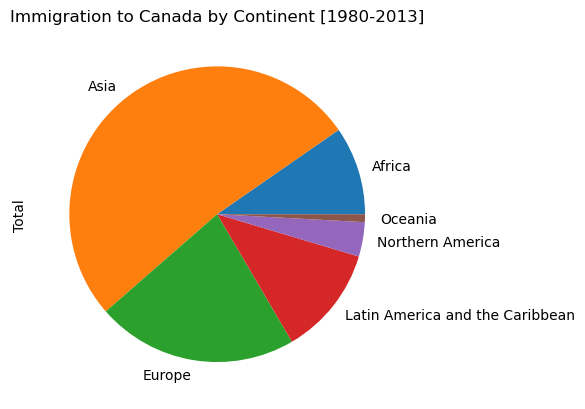

In [43]:
df_continent['Total'].plot(kind='pie')
plt.title('Immigration to Canada by Continent [1980-2013]')
plt.show()

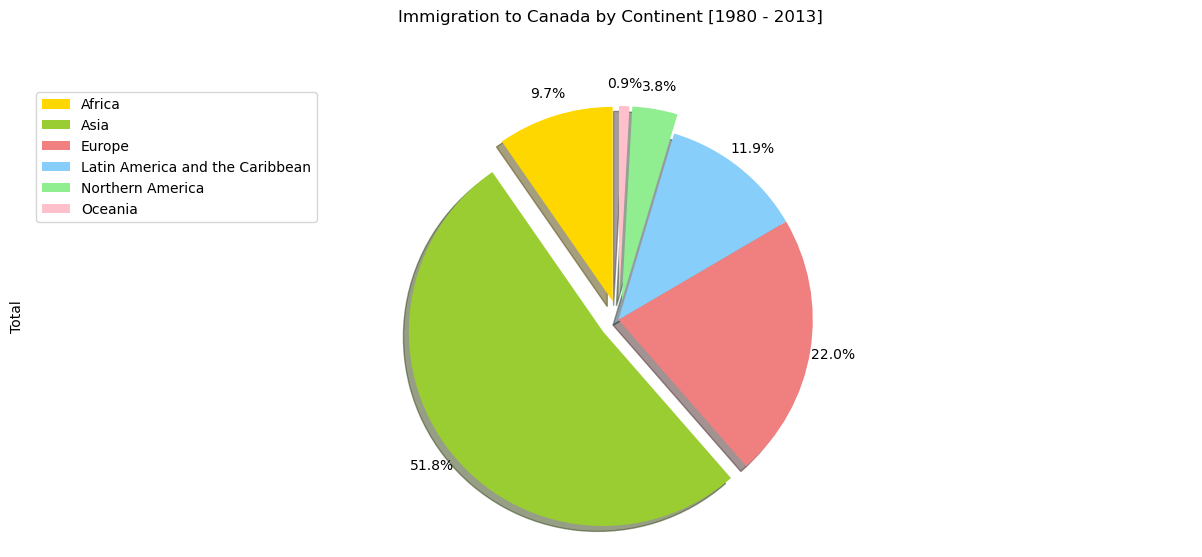

In [44]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.1, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continent['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',   # create %
                            startangle=90,       # start angle represent starting point
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continent.index, loc='upper left') 

plt.show()

### Box plot

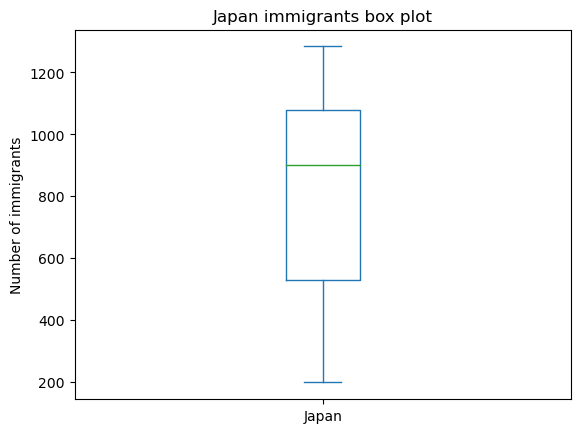

In [45]:
df_japan = df.loc[['Japan'], years].transpose()
df_japan.plot(kind='box')
plt.title("Japan immigrants box plot")
plt.ylabel("Number of immigrants")
plt.show()

### Scatter plot

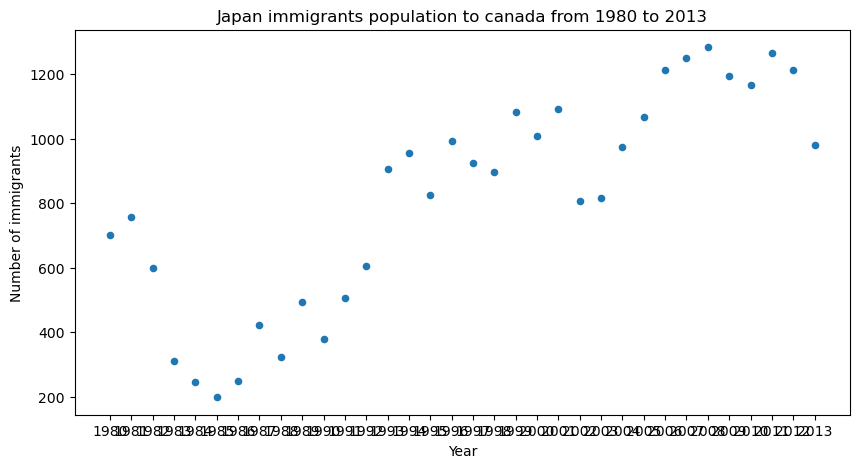

In [46]:
df_japan = df_japan.reset_index()
df_japan.plot(kind='scatter', x='index', y='Japan', figsize=(10,5))
plt.title("Japan immigrants population to canada from 1980 to 2013")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")
plt.show()

## Part 2: Seaborn
### Regression plot
#### Import dftotal csv file which includes total of immigrations in each year

In [47]:
df_total= pd.read_csv('dftotal.csv')

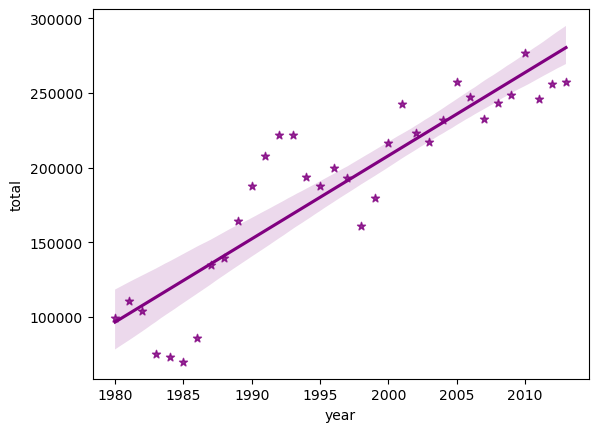

In [48]:
ax = sns.regplot(x='year', y='total', data=df_total,
                color='purple', marker='*')

## Part 3: Plotly

In [49]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

### Line plot

In [50]:
# Create sample data
np.random.seed(10)
x = np.arange(12)
y = np.random.randint(50,500, size=12)

In [51]:
# With go
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.update_layout(title='Simple Line Plot', xaxis_title='Months', yaxis_title='Sales')
fig.show()

In [52]:
# With express
fig = px.line(x=x, y=y, title='Simple Line Plot', labels=dict(x='Month', y='Sales'))
fig.show()

### Area plot

In [53]:
fig = px.area(x=x, y=y, title='Simple Line Plot', labels=dict(x='Month', y='Sales'))
fig.show()

### Bar plot

In [54]:
fig = px.bar(x=x, y=y, title='Simple Line Plot', labels=dict(x='Month', y='Sales'))
fig.show()